<a href="https://colab.research.google.com/github/angelsoalmeida/imersao-dados-desafio-final/blob/main/An%C3%A1lise_de_dados_Drug_Discovery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Importando bibliotecas**




In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

##**Conhecendo os dados de experimento**

###**Importando base de dados experimentos**

In [4]:
url_dados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'

dados = pd.read_csv(url_dados, compression = 'zip')
dados.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


###**Variáveis**

In [59]:
dados.columns

Index(['id', 'tratamento', 'tempo', 'dose', 'droga', 'g-0', 'g-1', 'g-2',
       'g-3', 'g-4',
       ...
       'c-90', 'c-91', 'c-92', 'c-93', 'c-94', 'c-95', 'c-96', 'c-97', 'c-98',
       'c-99'],
      dtype='object', length=877)

Com base na amostra exibida podemos verificar uma quantidade consideravel de colunas **g-** que representam as expressões gênicas e também as **c-** que representam a viabilidade celular.

####**Frequências**

In [60]:
dados['tratamento'].value_counts()

com_droga       21948
com_controle     1866
Name: tratamento, dtype: int64

Conseguimos verificar que há dois tipos de tramento: 

*   com_droga: caso em que um composto ativo foi utilizado
*   com_controle: caso em que não foi utilizado um composto ativo, para servir de comparação referente as demais características





In [61]:
dados['dose'].value_counts()

D1    12147
D2    11667
Name: dose, dtype: int64

Também é possível verificar que há tipos de doses diferentes: D1 e D2

In [62]:
dados['tempo'].value_counts()

48    8250
72    7792
24    7772
Name: tempo, dtype: int64

O tempo é outra característica de nossos dados e aqui representa a exposição em horas, podendo ser 24, 48 ou 72h.

In [63]:
dados['droga'].value_counts()

cacb2b860    1866
87d714366     718
9f80f3f77     246
8b87a7a83     203
5628cb3ee     202
             ... 
809527b9d       1
4a8eda087       1
0dedfb162       1
bef38f2fd       1
fb69fd749       1
Name: droga, Length: 3289, dtype: int64

Temos ao todo 3289 drogas diferentes em nossa tabela.

####**Proporções**

In [64]:
dados['tratamento'].value_counts(normalize = True)

com_droga       0.921643
com_controle    0.078357
Name: tratamento, dtype: float64

In [65]:
dados['dose'].value_counts(normalize = True)

D1    0.510078
D2    0.489922
Name: dose, dtype: float64

In [66]:
dados['tempo'].value_counts(normalize = True)

48    0.346435
72    0.327202
24    0.326363
Name: tempo, dtype: float64

#####**Amostra de expressão gênica para um único gene**

In [67]:
len(dados['g-0'].unique())

14367

In [68]:
dados['g-0'].unique()

array([ 1.062 ,  0.0743,  0.628 , ...,  0.3942,  0.666 , -0.8598])

#####**Amostra celular**

In [69]:
len(dados['c-0'].unique())

14421

In [70]:
dados['c-0'].unique()

array([-0.06  ,  0.0927, -0.1312, ...,  0.3509,  0.9538, -2.389 ])

##**Analisando os experimentos**

In [5]:
#renomeando coluna droga para composto
mapa = {'droga': 'composto'}
dados.rename(columns=mapa, inplace=True)

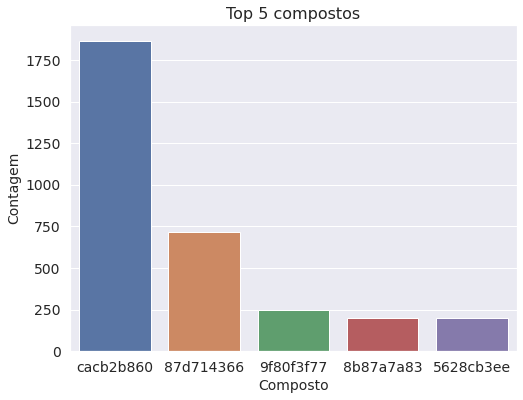

In [72]:
#armazenando em variavel os 5 compostos com maior frequencia na base de dados
cod_compostos = dados['composto'].value_counts().index[0:5]

#plotando o grafico dos principais compostos
sns.set()
plt.rc('axes', titlesize=16)     # O tamanho da fonte do título
plt.rc('axes', labelsize=14)    # O tamanho da fonte dos eixos x e y
plt.rc('xtick', labelsize=14)    # O tamanho da fonte dos números e texto no eixo x
plt.rc('ytick', labelsize=14)    # O tamanho da fonte dos números e texto no eixo y

plt.figure(figsize=(8, 6))
ax = sns.countplot(x = 'composto', 
                   data=dados.query('composto in @cod_compostos'), 
                   order=cod_compostos)
ax.set_title('Top 5 compostos')
ax.set_ylabel('Contagem')
ax.set_xlabel('Composto')
plt.show()

In [73]:
#recuperando todos os compostos cujo tratamento é com controle
dados.query("tratamento=='com_controle'")['composto'].unique()

array(['cacb2b860'], dtype=object)

Através da consulta pelo tratamento foi possível verificar que o composto **cacb2b860** não se trata de uma droga e sim representa o controle para comparações com os demais compostos.

In [74]:
dados.loc[:,'g-0':'g-771'].describe()

,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,g-38,g-39,...,g-732,g-733,g-734,g-735,g-736,g-737,g-738,g-739,g-740,g-741,g-742,g-743,g-744,g-745,g-746,g-747,g-748,g-749,g-750,g-751,g-752,g-753,g-754,g-755,g-756,g-757,g-758,g-759,g-760,g-761,g-762,g-763,g-764,g-765,g-766,g-767,g-768,g-769,g-770,g-771
count,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,...,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000
mean,0.248366,-0.095684,0.152253,0.081971,0.057347,-0.138836,0.035961,-0.202651,-0.190083,0.119905,-0.123321,0.182307,0.143203,0.209402,-0.173884,-0.024432,0.126823,-0.146663,0.087687,-0.082982,-0.111908,-0.087379,0.047548,-0.117474,-0.113212,-0.052746,-0.091055,0.112176,-0.046458,-0.076239,-0.197699,0.382177,-0.189432,0.078791,-0.093312,0.135729,-0.188616,-0.606710,0.534425,0.132026,...,0.263569,-0.242638,0.110180,-0.039868,-0.064056,0.193629,0.004470,-0.187085,0.067186,0.006159,-0.201189,-0.243317,0.548903,0.247065,0.085950,0.090544,0.215525,-0.007705,0.236954,0.022785,0.103224,0.048402,0.109367,-0.103262,0.004129,0.066211,0.072773,-0.033051,-0.400643,-0.338978,0.207299,0.009161,0.171027,0.002316,-0.209799,-0.076251,0.134162,-0.128018,-0.219210,0.101524
std,1.393399,0.812363,1.035731,0.950012,1.032091,1.179388,0.882395,1.125494,1.749885,1.087180,1.291501,1.253604,1.234590,1.273068,1.247178,0.659839,1.418997,1.179688,0.743301,0.844796,1.219529,0.824401,0.924838,0.760159,1.203186,0.866977,1.103765,1.001687,1.027758,1.279399,1.302567,1.559174,0.933514,1.172270,1.174325,1.061719,1.397677,2.200277,2.003317,0.990477,...,1.075809,1.309482,0.881283,0.917119,1.186966,1.212621,1.175611,1.182180,1.057292,0.996940,1.029370,1.378815,2.023791,1.639307,1.238753,0.961212,1.293783,0.966213,1.284074,1.015557,1.035968,1.048645,0.856080,1.175372,0.701031,0.996914,1.077310,1.579948,1.913468,1.701554,1.096488,1.200395,1.357701,1.052771,1.201918,1.115477,0.951264,1.230636,1.326193,1.417674
min,-5.513000,-5.737000,-9.104000,-5.998000,-6.369000,-10.000000,-10.000000,-10.000000,-10.000000,-8.337000,-10.000000,-5.870000,-8.587000,-5.018000,-10.000000,-10.000000,-10.000000,-10.000000,-4.226000,-10.000000,-10.000000,-5.700000,-10.000000,-10.000000,-10.000000,-8.272000,-8.184000,-4.835000,-7.913000,-10.000000,-10.000000,-2.956000,-8.356000,-7.182000,-10.000000,-9.261000,-10.000000,-10.000000,-10.000000,-4.223000,...,-5.504000,-10.000000,-3.790000,-10.000000,-10.000000,-10.000000,-7.920000,-10.000000,-9.462000,-6.634000,-10.000000,-10.000000,-2.912000,-9.833000,-7.227000,-5.561000,-8.393000,-5.790000,-4.915000,-10.000000,-10.000000,-7.918000,-5.255000,-10.000000,-6.264000,-10.000000,-5.505000,-10.000000,-10.000000,-10.000000,-8.193000,-10.000000,-9.795000,-8.180000,-10.000000,-10.000000,-4.269000,-10.000000,-10.000000,-10.000000
25%,-0.473075,-0.562200,-0.437750,-0.429575,-0.470925,-0.602225,-0.493900,-0.525175,-0.511675,-0.360200,-0.511475,-0.489675,-0.447500,-0.481200,-0.607975,-0.404150,-0.391950

O método **describe** nos permite obter alguns agregadores para as variáveis numéricas, tal como contagem, media, desvio padrão, mínimo, máximo e quarts.

In [75]:
dados.loc[:,'tratamento'].describe()

count         23814
unique            2
top       com_droga
freq          21948
Name: tratamento, dtype: object

Já para as variáveis que não sáo numéricas são retornadas outras características, como contagem, valores únicos, item de maior frequência e quantidade do mesmo.

###**Histogramas**

In [82]:
#definindo função para criar histograma para não ficar repetindo código
def cria_histograma(dados, titulo, bins):
  plt.figure(figsize=(8, 6))
  sns.histplot(data=dados,bins=bins) 

  plt.title(titulo)
  plt.ylabel('Contagem')

  plt.show()

Histogramas com amostragem das expressões gênicas do gene **g-0** e **g-100** de nossa tabela.

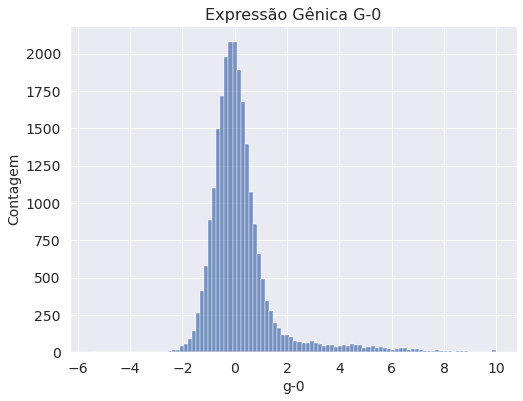

In [84]:
cria_histograma(dados['g-0'],'Expressão Gênica G-0', 100)

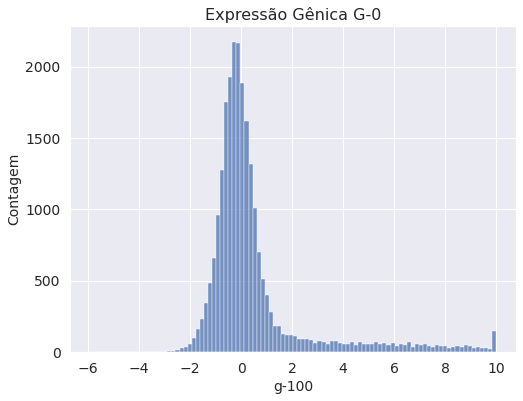

In [85]:
cria_histograma(dados['g-100'],'Expressão Gênica G-0', 100)

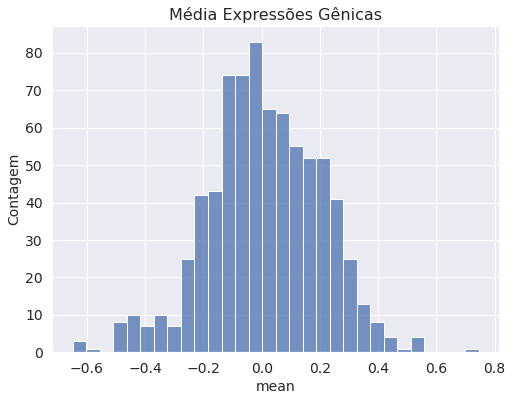

In [92]:
cria_histograma(dados.loc[:,'g-0':'g-771'].describe().T['mean'],'Média Expressões Gênicas',30 )

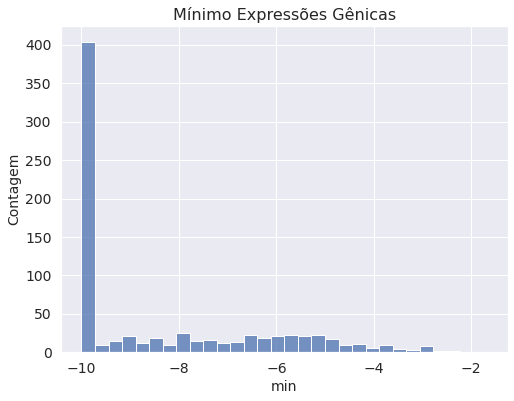

In [87]:
cria_histograma(dados.loc[:,'g-0':'g-771'].describe().T['min'],'Mínimos Expressões Gênicas',30 )

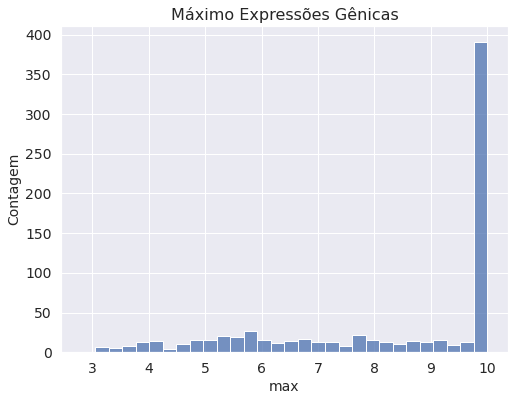

In [88]:
cria_histograma(dados.loc[:,'g-0':'g-771'].describe().T['max'],'Máximos Expressões Gênicas',30 )

Através dos historgramas podemos verificar que há uma concentração nos mínimos e máximos, provavelmente em decorrência de normalização do dados efetuada previament.

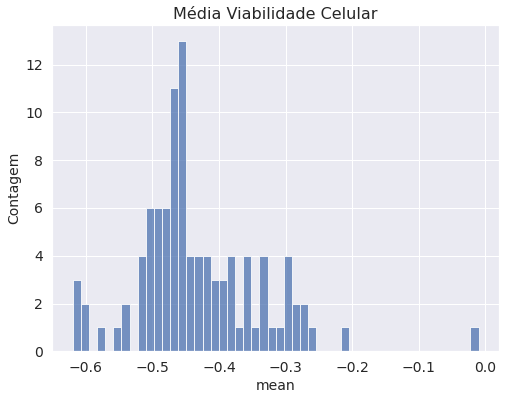

In [89]:
cria_histograma(dados.loc[:,'c-0':'c-99'].describe().T['mean'],'Média Viabilidade Celular',50 )

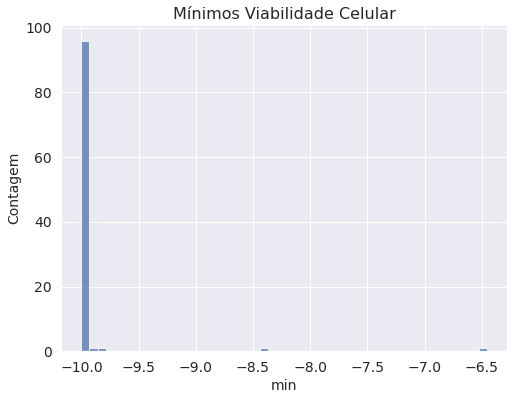

In [90]:
cria_histograma(dados.loc[:,'c-0':'c-99'].describe().T['min'],'Mínimos Viabilidade Celular',50 )

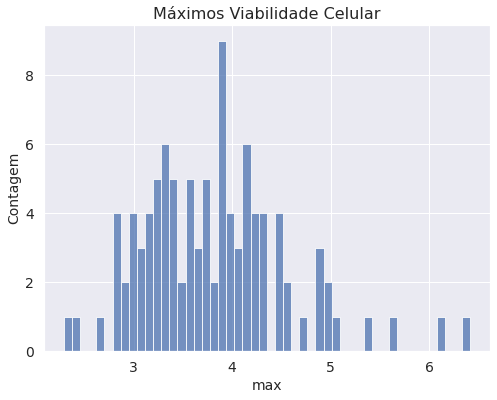

In [91]:
cria_histograma(dados.loc[:,'c-0':'c-99'].describe().T['max'],'Máximos Viabilidade Celular',50 )

Os histogramas da vialbilidade celular também apresentam concentração de valores mínimos, porém os máximo são bem mais distribuidos.

###**Comparações**

####**Boxplot**

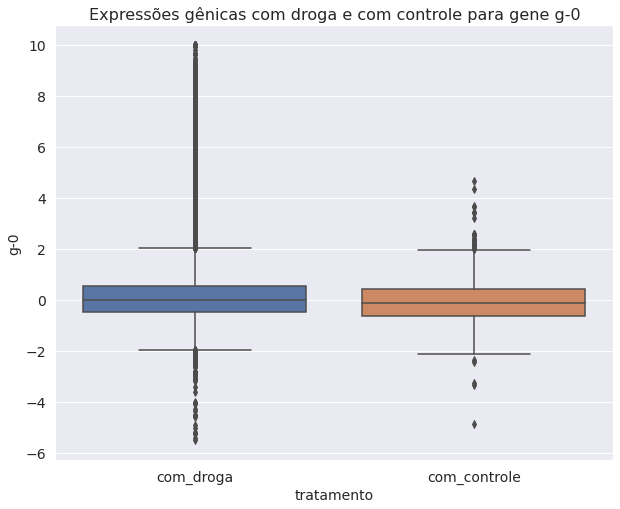

In [96]:
plt.figure(figsize=(10,8))
sns.boxplot(y='g-0', x='tratamento' , data=dados)
plt.title('Expressões gênicas com droga e com controle para gene g-0')

plt.show()

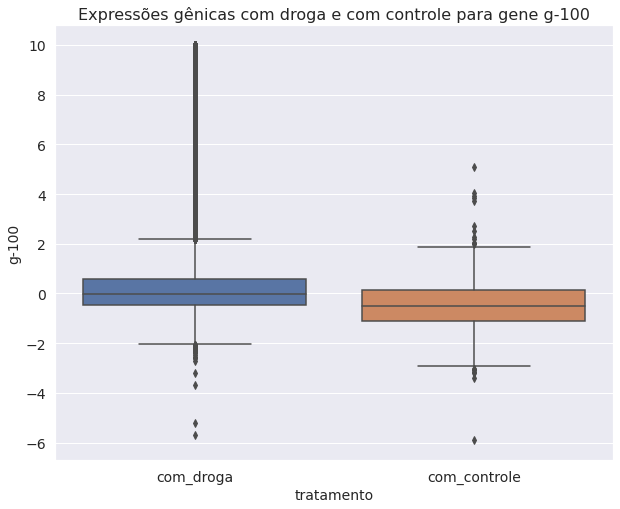

In [97]:
plt.figure(figsize=(10,8))
sns.boxplot(y='g-100', x='tratamento' , data=dados)
plt.title('Expressões gênicas com droga e com controle para gene g-100')

plt.show()

####**Scatterplot**

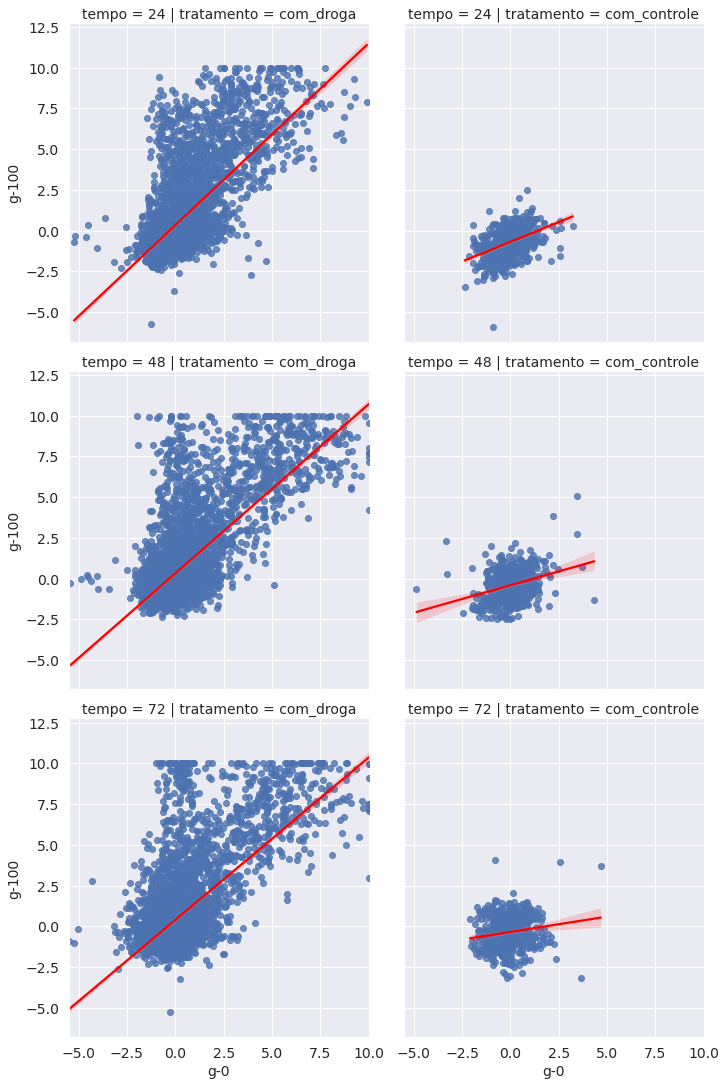

In [100]:
sns.lmplot(data=dados, x='g-0', y='g-100', line_kws={'color': 'red'}, col='tratamento', row='tempo')
plt.show()

Pelos gráficos podemos notar que quando g-0 aumenta, g-100 também esta aumentando, porém a inclinação da reta esta diminuindo o que pode indicar que os valores não continuariam aumentando. Importante salientar que os valores de um não interferem no outro, estamos apenas comparando os mesmos.

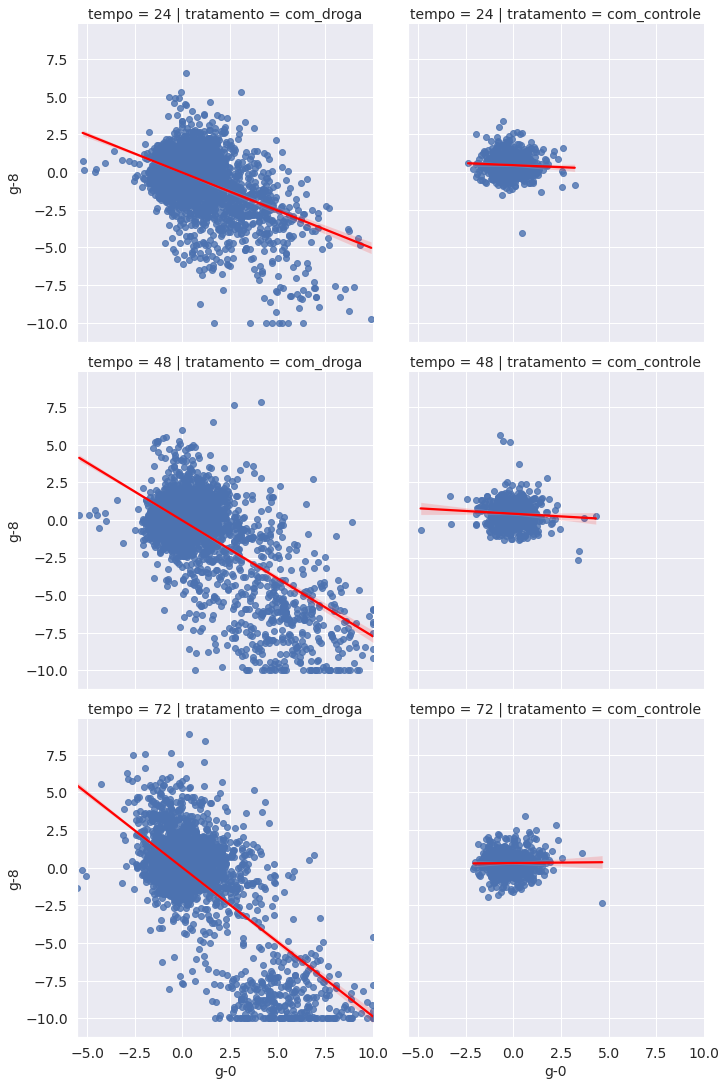

In [101]:
sns.lmplot(data=dados, x='g-0', y='g-8', line_kws={'color': 'red'}, col='tratamento', row='tempo')
plt.show()

Pelos gráfico podemos notar um comportamento oposto do anterior, pois aqui enquanto g-0 aumenta g-8 esta diminuindo com aumento também da inclinação a reta, o que pode indicar que os valores de g-8 continuariam diminuindo.




###**Correlações**

In [ ]:
#funcao para gerar grafico de correlacao
def gera_grafico_correlacao(corr):
  # Generate a mask for the upper triangle
  mask = np.triu(np.ones_like(corr, dtype=bool))

  # Set up the matplotlib figure
  f, ax = plt.subplots(figsize=(11, 9))

  # Generate a custom diverging colormap
  cmap = sns.diverging_palette(230, 20, as_cmap=True)

  # Draw the heatmap with the mask and correct aspect ratio
  sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [102]:
corr_full = dados.loc[:,'g-0':'g-771'].corr()

In [103]:
corr_full

,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,g-38,g-39,...,g-732,g-733,g-734,g-735,g-736,g-737,g-738,g-739,g-740,g-741,g-742,g-743,g-744,g-745,g-746,g-747,g-748,g-749,g-750,g-751,g-752,g-753,g-754,g-755,g-756,g-757,g-758,g-759,g-760,g-761,g-762,g-763,g-764,g-765,g-766,g-767,g-768,g-769,g-770,g-771
g-0,1.000000,0.086032,0.176188,0.011266,0.403153,-0.165478,0.238348,-0.374451,-0.604212,-0.428779,-0.547606,0.219762,-0.199453,0.472223,-0.346179,-0.201323,-0.513026,-0.433536,-0.002073,-0.074622,-0.468599,0.052445,0.022269,-0.076298,-0.337522,-0.235191,-0.422814,0.148432,-0.471092,-0.296871,-0.528327,0.558136,-0.133229,-0.155987,-0.120247,0.327593,-0.147800,-0.591868,0.602623,0.450769,...,0.365095,-0.528006,0.295970,0.067108,-0.250243,-0.110665,-0.214344,-0.280492,-0.036098,-0.128288,-0.498922,-0.469595,0.673664,0.538050,0.297528,0.066530,0.240252,-0.170949,0.485924,-0.093815,0.397476,0.017923,0.321260,-0.131709,-0.133430,0.178220,0.201902,-0.205648,-0.676835,-0.433554,0.005085,-0.239410,0.548401,0.425222,-0.308095,-0.052622,0.300241,-0.127375,-0.514201,0.405908
g-1,0.086032,1.000000,-0.054518,-0.027855,0.193647,-0.151590,-0.122541,0.144537,-0.009973,-0.047558,-0.009051,0.161274,0.037178,-0.009256,0.002632,-0.070193,-0.063414,-0.000944,-0.023748,-0.034714,-0.131031,0.196596,-0.061441,0.090620,-0.004299,-0.032600,-0.019435,0.015661,-0.098907,-0.091071,-0.053331,-0.049514,0.187382,-0.091232,0.045417,0.044373,-0.077671,-0.005265,-0.042213,0.050546,...,-0.015556,-0.017184,0.043104,-0.189662,-0.050194,-0.007878,-0.083539,-0.042175,0.014307,-0.134166,-0.026985,0.088382,-0.077453,0.015545,-0.027527,-0.071078,-0.095445,0.049612,-0.040518,-0.074277,-0.022356,0.125763,-0.082779,0.020292,-0.023171,-0.207192,-0.066570,-0.057007,0.002062,0.029795,-0.205998,0.060051,0.115071,0.160140,0.015098,-0.003378,-0.030756,-0.006866,-0.095108,-0.032233
g-2,0.176188,-0.054518,1.000000,0.042633,0.013968,0.018516,0.015190,-0.144205,-0.128029,-0.081332,-0.105050,0.011198,-0.063501,0.082011,-0.082204,-0.059607,-0.137811,-0.085491,0.053335,0.028813,-0.061160,-0.129131,-0.007426,-0.034230,-0.128312,-0.067363,-0.126554,0.036984,-0.129481,-0.017941,-0.152288,0.172191,-0.100086,-0.033010,-0.015481,0.001098,-0.020374,-0.157977,0.169464,0.144449,...,0.089525,-0.140916,0.008587,0.042106,-0.018846,-0.008093,-0.074404,-0.080120,-0.020085,-0.028099,-0.098775,-0.113000,0.175916,0.119166,0.071051,0.025358,0.078971,-0.086326,0.149456,0.033432,0.124239,-0.006327,0.120148,-0.041162,-0.030040,0.048549,0.096369,0.000494,-0.172627,-0.130200,0.090115,-0.055655,0.138085,0.061574,-0.093631,-0.053149,0.115415,0.014489,-0.078661,0.103985
g-3,0.011266,-0.027855,0.042633,1.000000,-0.033039,0.042231,-0.043177,-0.175692,-0.086167,-0.014052,-0.074101,0.181024,0.030539,0.192727,0.128792,-0.045688,0.033974,-0.070920,0.237669,0.112392,0.027867,-0.167263,0.197013,-0.049480,-0.113336,0.175615,0.111355,0.007168,-0.022381,-0.128269,-0.042827,0.098416,-0.091962,-0.083806,0.184985,-0.070933,-0.317859,-0.228039,0.084346,0.054827,...,0.039519,0.000851,0.011655,-0.116724,0.304819,-0.087159,-0.134135,-0.031211,0.174116,0.060289,-0.119276,-0.140391,0.110547,0.145925,0.155011,0.049182,-0.007754,-0.128488,0.078139,0.012422,0.040728,0.164467,0.171886,-0.069777,0.066560,0.102111,-0.036922,0.111994,-0.133740,-0.226928,0.075982,0.178422,0.016467,-0.089317,-0.166426,-0.179370,0.028452,-0.206077,-0.002142,0.058219
g-4,0.403153,0.193647,0.013968,-0.033039,1.000000,-0.057449,0.206405,-0.032748,-0.474828,-0.274167,-0.458021,0.116467,-0.207078,0.210440,-0.307280,0.019531,-0.275700,-0.422889,-0.012207,-0.088152,-0.311798,0.286106,-0.055368,-0.113396,-0.120743,-0.233682,-0.340708,0.070292,-0.360274,-0.225461,-0.402256,0.324362,0.091731,-0.052787,-0.073490,0.195062,-0.124394,-0.277002,0.285256,0.300517,...,0.215930,-0.292602,-0.008241,-0.005070,-0.284391,-0.116918,-0.252399,-0.250280,0

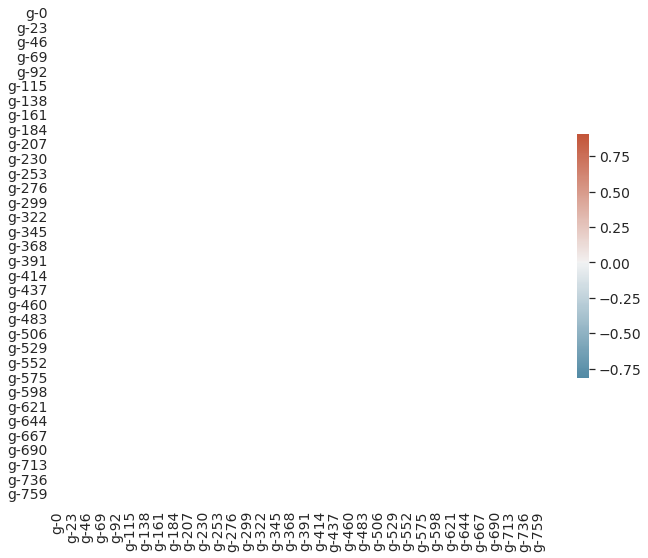

In [108]:
gera_grafico_correlacao(corr_full)

Devido a quantidade de colunas não conseguimos exibir um grafico satisfatório da base completa, portanto irei demonstrar a correlação por amostragem.

In [104]:
corr_amostra_1 = dados.loc[:,'g-0':'g-50'].corr()
corr_amostra_1

,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,g-38,g-39,g-40,g-41,g-42,g-43,g-44,g-45,g-46,g-47,g-48,g-49,g-50
g-0,1.000000,0.086032,0.176188,0.011266,0.403153,-0.165478,0.238348,-0.374451,-0.604212,-0.428779,-0.547606,0.219762,-0.199453,0.472223,-0.346179,-0.201323,-0.513026,-0.433536,-0.002073,-0.074622,-0.468599,0.052445,0.022269,-0.076298,-0.337522,-0.235191,-0.422814,0.148432,-0.471092,-0.296871,-0.528327,0.558136,-0.133229,-0.155987,-0.120247,0.327593,-0.147800,-0.591868,0.602623,0.450769,-0.432426,-0.499815,-0.203828,0.021582,-0.023423,-0.119687,0.530238,0.039827,0.238235,0.310583,-0.560201
g-1,0.086032,1.000000,-0.054518,-0.027855,0.193647,-0.151590,-0.122541,0.144537,-0.009973,-0.047558,-0.009051,0.161274,0.037178,-0.009256,0.002632,-0.070193,-0.063414,-0.000944,-0.023748,-0.034714,-0.131031,0.196596,-0.061441,0.090620,-0.004299,-0.032600,-0.019435,0.015661,-0.098907,-0.091071,-0.053331,-0.049514,0.187382,-0.091232,0.045417,0.044373,-0.077671,-0.005265,-0.042213,0.050546,0.000655,-0.110238,0.133896,0.161186,-0.092498,0.031993,0.097674,-0.012420,0.029064,-0.106349,-0.028870
g-2,0.176188,-0.054518,1.000000,0.042633,0.013968,0.018516,0.015190,-0.144205,-0.128029,-0.081332,-0.105050,0.011198,-0.063501,0.082011,-0.082204,-0.059607,-0.137811,-0.085491,0.053335,0.028813,-0.061160,-0.129131,-0.007426,-0.034230,-0.128312,-0.067363,-0.126554,0.036984,-0.129481,-0.017941,-0.152288,0.172191,-0.100086,-0.033010,-0.015481,0.001098,-0.020374,-0.157977,0.169464,0.144449,-0.080201,-0.109646,-0.121433,-0.086435,0.021241,-0.036105,0.142712,-0.009575,0.039119,0.052003,-0.140002
g-3,0.011266,-0.027855,0.042633,1.000000,-0.033039,0.042231,-0.043177,-0.175692,-0.086167,-0.014052,-0.074101,0.181024,0.030539,0.192727,0.128792,-0.045688,0.033974,-0.070920,0.237669,0.112392,0.027867,-0.167263,0.197013,-0.049480,-0.113336,0.175615,0.111355,0.007168,-0.022381,-0.128269,-0.042827,0.098416,-0.091962,-0.083806,0.184985,-0.070933,-0.317859,-0.228039,0.084346,0.054827,0.114685,-0.047136,-0.010941,-0.168398,-0.001770,0.065444,0.082046,0.297146,0.173796,0.072970,-0.233491
g-4,0.403153,0.193647,0.013968,-0.033039,1.000000,-0.057449,0.206405,-0.032748,-0.474828,-0.274167,-0.458021,0.116467,-0.207078,0.210440,-0.307280,0.019531,-0.275700,-0.422889,-0.012207,-0.088152,-0.311798,0.286106,-0.055368,-0.113396,-0.120743,-0.233682,-0.340708,0.070292,-0.360274,-0.225461,-0.402256,0.324362,0.091731,-0.052787,-0.073490,0.195062,-0.124394,-0.277002,0.285256,0.300517,-0.309149,-0.373390,0.071462,0.185361,-0.105936,-0.033695,0.355833,-0.060724,0.006138,0.114748,-0.315675
g-5,-0.165478,-0.151590,0.018516,0.042231,-0.057449,1.000000,0.083620,0.102345,0.073885,0.126561,0.038743,-0.171709,-0.000393,-0.112423,0.073760,0.037763,0.221227,0.033641,0.041073,0.134431,0.136226,0.042455,0.095901,-0.000709,0.120697,0.082212,0.058257,-0.106304,0.137596,0.171353,0.136856,-0.133521,0.025275,-0.070144,0.058305,-0.108843,-0.034259,0.142193,-0.189048,-0.097622,0.208673,0.206885,0.120727,-0.031065,-0.047988,0.090507,-0.176810,0.023328,0.039471,-0.127953,0.128877
g-6,0.238348,-0.122541,0.015190,-0.043177,0.206405,0.083620,1.000000,0.030544,-0.212292,-0.134739,-0.264575,-0.064363,-0.041731,0.110102,-0.126069,-0.107593,-0.109543,-0.182960,-0.058387,0.070343,0.049195,0.244205,-0.076039,-0.063008,0.034160,-0.002408,-0.194962,-0.051850,-0.032510,0.091318,-0.113642,0.179365,0.065968,-0.059884,-0.114453,0.102340,0.106371,-0.038967,0.045983,0.073990,-0.040374,-0.006081,-0.170005,0.137326,0.053565,-0.003568,0.094446,-0.045317,-0.074863,0.104435,0.026171
g-7,-0.374451,0.144537,-0.144205,-0.175692,-0.032748,0.102345,0.030544,1.000000,0.278085,0.288780,0.382325,-0.184966,0.166101,-0.380687,0.266334,0.141999,0.372104,0.185269,-0.061020,0.121534,0.231938,0.321506,-0.043685,0.143473,0.458273,0.123891,0.262002,-0.126174,0.287440,0.222967,0.419395,-0.453566,0.492635,-0.036

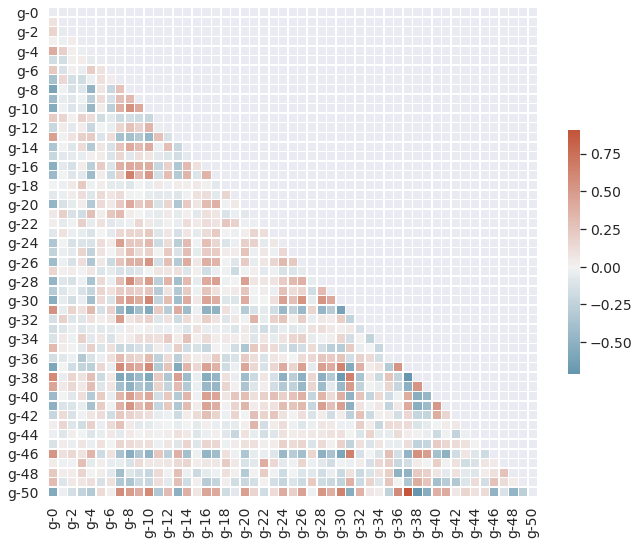

In [109]:
gera_grafico_correlacao(corr_amostra_1)

In [110]:
corr_amostra_2 = dados.loc[:,'g-50':'g-100'].corr()
corr_amostra_2

,g-50,g-51,g-52,g-53,g-54,g-55,g-56,g-57,g-58,g-59,g-60,g-61,g-62,g-63,g-64,g-65,g-66,g-67,g-68,g-69,g-70,g-71,g-72,g-73,g-74,g-75,g-76,g-77,g-78,g-79,g-80,g-81,g-82,g-83,g-84,g-85,g-86,g-87,g-88,g-89,g-90,g-91,g-92,g-93,g-94,g-95,g-96,g-97,g-98,g-99,g-100
g-50,1.000000,-0.271639,0.489897,-0.217038,-0.293349,0.426960,0.120390,0.028499,0.794489,0.513568,-0.061800,0.431898,0.531379,0.778636,0.359427,-0.522411,-0.398673,0.585616,-0.585430,-0.186691,0.578778,0.166611,0.776893,-0.155707,-0.446907,0.658473,0.091527,-0.097157,-0.119328,0.452443,0.454968,0.018432,-0.243842,-0.615051,-0.309913,-0.500352,-0.587780,0.175578,-0.209161,0.202329,-0.454502,-0.688402,-0.420204,-0.152348,0.112920,-0.629734,0.705992,-0.495384,0.542119,0.116578,-0.670182
g-51,-0.271639,1.000000,-0.111377,0.276374,0.199895,-0.432472,-0.003136,-0.026191,-0.133245,-0.116825,0.095863,-0.314837,-0.398282,-0.344626,-0.267149,0.191043,0.107611,-0.402489,0.250043,0.179086,-0.203874,0.061980,-0.362327,0.052511,0.418695,-0.261559,0.133499,-0.183403,0.118943,-0.224072,-0.367760,-0.145426,0.133971,0.253392,0.002255,0.307180,0.304918,0.032723,0.210307,-0.226140,0.408697,0.299783,0.218551,0.059788,-0.111292,0.274167,-0.200053,0.372633,-0.269089,-0.139715,0.280869
g-52,0.489897,-0.111377,1.000000,0.060905,-0.166093,0.068472,-0.059976,-0.094752,0.501399,0.325131,0.337901,0.220661,0.224001,0.485564,0.050521,-0.315613,-0.076333,0.244004,-0.121114,-0.129992,0.348904,0.193118,0.399137,0.172997,-0.150840,0.285234,0.019458,-0.161894,-0.111622,0.320228,-0.013586,0.043226,-0.094518,-0.276373,-0.189046,-0.310802,-0.246164,0.253388,-0.078083,0.318218,0.003566,-0.431421,-0.210685,-0.088809,0.154444,-0.336142,0.466927,-0.331733,0.293694,-0.152516,-0.374589
g-53,-0.217038,0.276374,0.060905,1.000000,0.240624,-0.413374,-0.026018,-0.101590,-0.060678,-0.000780,0.242720,-0.302422,-0.315774,-0.300980,-0.221005,0.164119,0.103992,-0.283699,0.227264,0.126914,-0.184358,0.080923,-0.356873,0.214270,0.401060,-0.263142,0.095807,-0.108771,0.060158,-0.062073,-0.426026,-0.079603,0.063810,0.215489,0.253550,0.170820,0.322738,-0.019415,0.092934,-0.020302,0.343728,0.246275,0.109293,-0.069986,0.017636,0.191407,-0.141731,0.212448,-0.243279,-0.059895,0.198910
g-54,-0.293349,0.199895,-0.166093,0.240624,1.000000,-0.302602,-0.025122,-0.050132,-0.244740,-0.076550,0.008330,-0.288066,-0.331361,-0.374037,-0.135261,0.252486,0.100664,-0.342062,0.232727,0.136188,-0.245353,-0.008354,-0.376096,0.022112,0.356793,-0.343948,0.117322,-0.005786,0.112864,-0.189197,-0.191120,-0.088120,0.064010,0.310455,0.139935,0.195958,0.380381,-0.166549,0.154394,-0.168437,0.255410,0.359192,0.180033,0.015574,-0.001839,0.361428,-0.313241,0.305050,-0.297190,-0.048178,0.285286
g-55,0.426960,-0.432472,0.068472,-0.413374,-0.302602,1.000000,0.055945,0.111715,0.294707,0.384967,-0.208125,0.446670,0.535911,0.523015,0.488319,-0.299800,-0.276490,0.529841,-0.399851,-0.268547,0.375137,-0.136136,0.599279,-0.246981,-0.504115,0.431334,-0.189455,0.224768,-0.192215,0.183022,0.498713,0.117054,-0.169148,-0.418212,-0.262521,-0.342832,-0.485725,-0.044269,-0.288145,0.143429,-0.513519,-0.464449,-0.180187,-0.045411,0.012769,-0.406218,0.335346,-0.348134,0.406657,0.116555,-0.473356
g-56,0.120390,-0.003136,-0.059976,-0.026018,-0.025122,0.055945,1.000000,0.110009,0.110073,-0.003102,-0.093064,0.023101,0.106517,0.044535,0.034190,-0.043573,-0.054639,0.140464,-0.173988,-0.014873,0.068164,0.004215,0.068475,-0.091257,-0.086699,0.164560,-0.020844,-0.027944,-0.055785,0.074008,0.056888,0.062246,-0.032167,-0.122248,-0.002065,-0.016472,-0.121604,-0.021882,-0.059197,-0.039571,-0.109388,-0.080511,-0.148960,-0.083526,-0.031014,-0.096849,0.081432,-0.104599,0.074185,0.109654,-0.126433
g-57,0.028499,-0.026191,-0.094752,-0.101590,-0.050132,0.111715,0.110009,1.000000,0.058517,-0.114145,-0.146389,0.062839,0.158503,-0.036420,0.036174,-0.037277,0.067387,0.127939,-0.141912,-0.038854,0.069588,-0.081883,0.029700,-0.117807,-0.103860,0.131796,-0.089956,-0.064413,-0.045275,0.155224,0.027980,0.224354,-0.0

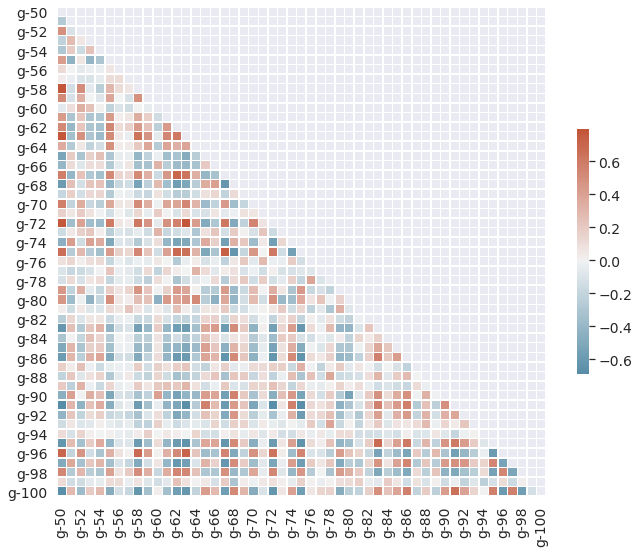

In [111]:
gera_grafico_correlacao(corr_amostra_2)

In [112]:
corr_celular_full = dados.loc[:,'c-0':'c-99'].corr()
corr_celular_full

,c-0,c-1,c-2,c-3,c-4,c-5,c-6,c-7,c-8,c-9,c-10,c-11,c-12,c-13,c-14,c-15,c-16,c-17,c-18,c-19,c-20,c-21,c-22,c-23,c-24,c-25,c-26,c-27,c-28,c-29,c-30,c-31,c-32,c-33,c-34,c-35,c-36,c-37,c-38,c-39,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
c-0,1.000000,0.827336,0.848472,0.798830,0.840695,0.844469,0.811946,0.793171,0.842977,0.759971,0.850533,0.832837,0.808033,0.836838,0.823716,0.827496,0.788947,0.831436,0.797051,0.796719,0.818420,0.823586,0.717807,0.805687,0.836447,0.837448,0.815484,0.840909,0.824231,0.807981,0.818558,0.855363,0.831066,0.820803,0.828947,0.829693,0.839386,0.774960,0.806885,0.849807,...,0.839605,0.846656,0.851796,0.797634,0.820904,0.806811,0.845954,0.825661,0.833020,0.812924,0.814969,0.837019,0.845174,0.847267,0.723442,0.845666,0.761470,0.791360,0.840550,0.812687,0.839668,0.825544,0.844675,0.852891,0.836344,0.859314,0.817635,0.787650,0.838987,0.827124,0.835217,0.832529,0.799196,0.817657,0.846457,0.815499,0.845579,0.834513,0.800682,0.777426
c-1,0.827336,1.000000,0.901416,0.808364,0.879258,0.869569,0.876924,0.793199,0.879892,0.812345,0.866297,0.884532,0.861089,0.880177,0.820911,0.857797,0.771984,0.843076,0.861134,0.820399,0.837626,0.852621,0.756086,0.812062,0.874647,0.829208,0.887230,0.853246,0.861559,0.789314,0.816042,0.889619,0.837788,0.866130,0.865169,0.840517,0.877007,0.779697,0.890506,0.835689,...,0.875778,0.823214,0.889565,0.868589,0.840502,0.856425,0.869802,0.886129,0.834581,0.814084,0.869416,0.826417,0.861290,0.851737,0.725885,0.884601,0.830345,0.846593,0.837897,0.844521,0.842983,0.885487,0.868565,0.870559,0.875755,0.874084,0.818480,0.793513,0.838070,0.811761,0.875405,0.839236,0.876519,0.868431,0.886750,0.803637,0.871383,0.866084,0.815952,0.781510
c-2,0.848472,0.901416,1.000000,0.830759,0.909991,0.882794,0.898819,0.812980,0.896087,0.821522,0.892033,0.904968,0.879638,0.910497,0.841421,0.884464,0.800587,0.879281,0.881011,0.824149,0.853648,0.878793,0.761439,0.832908,0.887800,0.859023,0.899897,0.879307,0.876141,0.824171,0.851934,0.906052,0.850681,0.890263,0.880173,0.852595,0.887820,0.799599,0.905449,0.866557,...,0.897347,0.848344,0.898224,0.887169,0.853978,0.874032,0.894848,0.892008,0.857836,0.838323,0.877652,0.849427,0.891245,0.890797,0.738358,0.892939,0.832679,0.858314,0.866675,0.858469,0.871477,0.899199,0.892636,0.887700,0.896144,0.891606,0.844756,0.800533,0.853413,0.835940,0.902964,0.872660,0.883866,0.885419,0.906584,0.837420,0.898270,0.874869,0.839640,0.802032
c-3,0.798830,0.808364,0.830759,1.000000,0.831523,0.829550,0.805506,0.752940,0.830369,0.765626,0.818465,0.828218,0.803839,0.822104,0.788432,0.818493,0.758345,0.804018,0.806834,0.781198,0.791121,0.816744,0.742109,0.792355,0.828853,0.829277,0.807726,0.816247,0.818892,0.790481,0.796522,0.830602,0.796222,0.804081,0.811296,0.805880,0.820989,0.747433,0.813351,0.827805,...,0.810208,0.797311,0.835446,0.817884,0.810944,0.788175,0.835219,0.813661,0.805820,0.794756,0.782965,0.806491,0.840010,0.824398,0.702892,0.823897,0.765937,0.802952,0.800673,0.803913,0.813930,0.835707,0.819130,0.813694,0.834414,0.819223,0.808987,0.772220,0.811936,0.796889,0.825342,0.813555,0.812200,0.803603,0.830301,0.799760,0.822001,0.814889,0.779998,0.768872
c-4,0.840695,0.879258,0.909991,0.831523,1.000000,0.883526,0.893285,0.808096,0.888384,0.822614,0.890057,0.904082,0.870384,0.911130,0.839991,0.879147,0.779366,0.879616,0.893702,0.807685,0.833680,0.885335,0.768383,0.854108,0.872477,0.872339,0.900002,0.869316,0.875701,0.808720,0.851560,0.901149,0.836846,0.891190,0.865017,0.851393,0.887747,0.792168,0.900725,0.870204,...,0.885975,0.837735,0.888442,0.900435,0.839403,0.862301,0.903555,0.885107,0.860831,0.835481,0.859855,0.850158,0.881167,0.893576,0.740225,0.882419,0.847703,0.847125,0.856590,0.862995,0.862491,0.903756,0.902625,0.879256,0.893951,0.882537,0.839999,0.779533,0.843129,0.816772,0.895967,0.890255,0.882185,0.868684,0.900309,0.839111,0

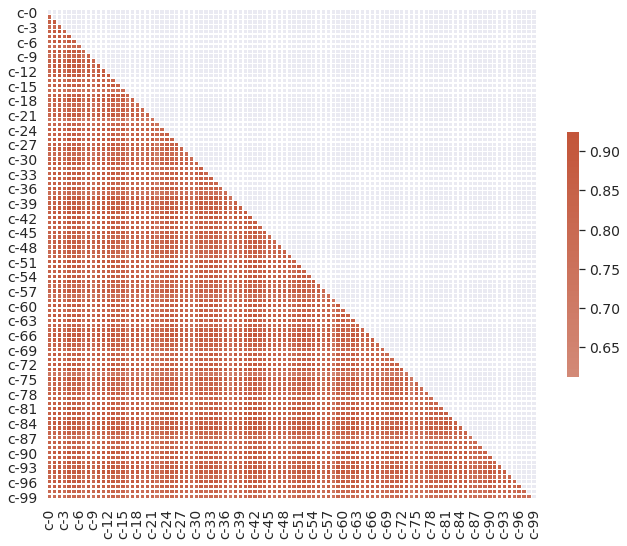

In [113]:
gera_grafico_correlacao(corr_celular_full)

In [114]:
corr_celular_amostra = dados.loc[:,'c-0':'c-50'].corr()
corr_celular_amostra

,c-0,c-1,c-2,c-3,c-4,c-5,c-6,c-7,c-8,c-9,c-10,c-11,c-12,c-13,c-14,c-15,c-16,c-17,c-18,c-19,c-20,c-21,c-22,c-23,c-24,c-25,c-26,c-27,c-28,c-29,c-30,c-31,c-32,c-33,c-34,c-35,c-36,c-37,c-38,c-39,c-40,c-41,c-42,c-43,c-44,c-45,c-46,c-47,c-48,c-49,c-50
c-0,1.000000,0.827336,0.848472,0.798830,0.840695,0.844469,0.811946,0.793171,0.842977,0.759971,0.850533,0.832837,0.808033,0.836838,0.823716,0.827496,0.788947,0.831436,0.797051,0.796719,0.818420,0.823586,0.717807,0.805687,0.836447,0.837448,0.815484,0.840909,0.824231,0.807981,0.818558,0.855363,0.831066,0.820803,0.828947,0.829693,0.839386,0.774960,0.806885,0.849807,0.847857,0.848941,0.847747,0.827377,0.847072,0.824247,0.816332,0.819386,0.778280,0.792811,0.797689
c-1,0.827336,1.000000,0.901416,0.808364,0.879258,0.869569,0.876924,0.793199,0.879892,0.812345,0.866297,0.884532,0.861089,0.880177,0.820911,0.857797,0.771984,0.843076,0.861134,0.820399,0.837626,0.852621,0.756086,0.812062,0.874647,0.829208,0.887230,0.853246,0.861559,0.789314,0.816042,0.889619,0.837788,0.866130,0.865169,0.840517,0.877007,0.779697,0.890506,0.835689,0.891745,0.870896,0.891842,0.869508,0.851121,0.858537,0.828145,0.854667,0.853745,0.845159,0.839386
c-2,0.848472,0.901416,1.000000,0.830759,0.909991,0.882794,0.898819,0.812980,0.896087,0.821522,0.892033,0.904968,0.879638,0.910497,0.841421,0.884464,0.800587,0.879281,0.881011,0.824149,0.853648,0.878793,0.761439,0.832908,0.887800,0.859023,0.899897,0.879307,0.876141,0.824171,0.851934,0.906052,0.850681,0.890263,0.880173,0.852595,0.887820,0.799599,0.905449,0.866557,0.909829,0.889876,0.909086,0.886977,0.880717,0.875814,0.854217,0.874174,0.863002,0.853704,0.848724
c-3,0.798830,0.808364,0.830759,1.000000,0.831523,0.829550,0.805506,0.752940,0.830369,0.765626,0.818465,0.828218,0.803839,0.822104,0.788432,0.818493,0.758345,0.804018,0.806834,0.781198,0.791121,0.816744,0.742109,0.792355,0.828853,0.829277,0.807726,0.816247,0.818892,0.790481,0.796522,0.830602,0.796222,0.804081,0.811296,0.805880,0.820989,0.747433,0.813351,0.827805,0.833075,0.821351,0.838118,0.821934,0.813087,0.806219,0.808859,0.812784,0.804207,0.818632,0.821138
c-4,0.840695,0.879258,0.909991,0.831523,1.000000,0.883526,0.893285,0.808096,0.888384,0.822614,0.890057,0.904082,0.870384,0.911130,0.839991,0.879147,0.779366,0.879616,0.893702,0.807685,0.833680,0.885335,0.768383,0.854108,0.872477,0.872339,0.900002,0.869316,0.875701,0.808720,0.851560,0.901149,0.836846,0.891190,0.865017,0.851393,0.887747,0.792168,0.900725,0.870204,0.904528,0.880368,0.913242,0.875934,0.878659,0.869324,0.862019,0.862095,0.862338,0.855029,0.851843
c-5,0.844469,0.869569,0.882794,0.829550,0.883526,1.000000,0.863932,0.794140,0.875615,0.810827,0.874461,0.883338,0.852764,0.877659,0.824086,0.865703,0.773152,0.843611,0.870892,0.819537,0.835350,0.866518,0.798246,0.833151,0.871687,0.866063,0.878555,0.854136,0.862635,0.803969,0.831032,0.874491,0.827969,0.858202,0.868679,0.842427,0.879457,0.766335,0.872094,0.862231,0.886947,0.880703,0.897040,0.876421,0.860547,0.855910,0.841310,0.862328,0.861956,0.851853,0.864223
c-6,0.811946,0.876924,0.898819,0.805506,0.893285,0.863932,1.000000,0.796485,0.873232,0.839685,0.884135,0.887255,0.867589,0.900492,0.839245,0.875685,0.768282,0.880802,0.895716,0.800826,0.850150,0.871791,0.752278,0.826409,0.876337,0.839224,0.897879,0.864267,0.878512,0.790123,0.859702,0.893770,0.821142,0.914730,0.868987,0.839136,0.857850,0.766112,0.910617,0.844998,0.898693,0.895083,0.908299,0.860556,0.874571,0.873974,0.828976,0.863283,0.857008,0.847009,0.825720
c-7,0.793171,0.793199,0.812980,0.752940,0.808096,0.794140,0.796485,1.000000,0.812357,0.728066,0.833612,0.810875,0.799748,0.821206,0.803563,0.820307,0.748862,0.817198,0.769116,0.779457,0.803508,0.787533,0.690031,0.773441,0.799476,0.790698,0.793321,0.816966,0.778022,0.775747,0.806346,0.824469,0.811058,0.829506,0.807257,0.803313,0.791785,0.735452,0.797602,0.810038,0.811687,0.817912,0.832790,0.783834,0.838290,0.811981,0.779971,0.799859,0.766085,0.766224,0.760949
c-8,0.842977,0.879892,0.896087,0.830369,0.888384,0

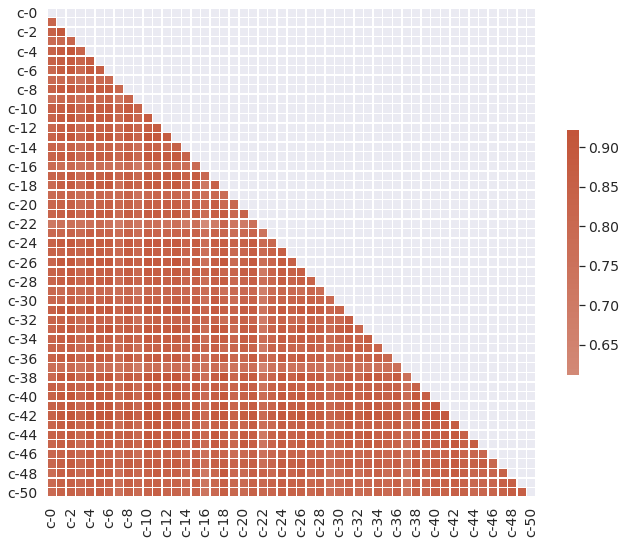

In [115]:
gera_grafico_correlacao(corr_celular_amostra)

Nos gráficos de correlação podemos notar esparsas correlações positivas entre os genes, o que pode indicar comportamentos distintos para genes distintos, já a correlação da viabilidade celular é bastante positiva indicando que se há viabilidade celular para uma cultura específica provavelmente haverá para outras também.

##**Trabalhando com os resultados**

###**Importando base de dados resultados**

In [6]:
dados_resultados = pd.read_csv('https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_resultados.csv?raw=true')
dados_resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,protein_synthesis_inhibitor,protein_tyrosine_kinase_inhibitor,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [117]:
dados_resultados.shape

(23814, 207)

As colunas referem-se aos tipos de mecanismos de ação das drogas em nosso organismo, iremos referenciar os mesmos como **moa** (do inglês *Mechanism of action*)

###**Reconhecendo padrões**

Através da verificação dos valores únicos das colunas podemos verificar que tratam-se de valores booleanos, no caso 1 para representar ativação e 0 sem ativação do mecanismo de ação.

In [118]:
dados_resultados.drop('id', axis=1).sum(axis=1)

0        1
1        0
2        3
3        0
4        1
        ..
23809    1
23810    1
23811    0
23812    1
23813    0
Length: 23814, dtype: int64

In [119]:
dados_resultados['5-alpha_reductase_inhibitor'].unique()

array([0, 1])

In [120]:
dados_resultados['11-beta-hsd1_inhibitor'].unique()

array([0, 1])

###**Frequência dos mecanismos de ação em nossos resultados**

In [121]:
contagem_moa = dados_resultados.drop('id', axis=1).sum().sort_values(ascending=False)
contagem_moa

nfkb_inhibitor                                832
proteasome_inhibitor                          726
cyclooxygenase_inhibitor                      435
dopamine_receptor_antagonist                  424
serotonin_receptor_antagonist                 404
                                             ... 
protein_phosphatase_inhibitor                   6
autotaxin_inhibitor                             6
diuretic                                        6
erbb2_inhibitor                                 1
atp-sensitive_potassium_channel_antagonist      1
Length: 206, dtype: int64

In [7]:
#Criação de coluna contendo a quantidade de mecanismos ativados por id
dados_resultados['n_moa'] = dados_resultados.drop('id', axis=1).sum(axis=1)
dados_resultados['n_moa']

0        1
1        0
2        3
3        0
4        1
        ..
23809    1
23810    1
23811    0
23812    1
23813    0
Name: n_moa, Length: 23814, dtype: int64

In [8]:
#Criação de coluna informando se para determinado id houve ou não ativação de algum mecanismo de ação
dados_resultados['ativo_moa'] = (dados_resultados['n_moa'] != 0)
dados_resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor,n_moa,ativo_moa
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,True
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,True
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,True


###**Juntando as bases experimentos e resultados**

In [10]:
#Efetuando merge dos dados, ou seja juntado as tabelas experimentos e resultados com base no id
dados_combinados = pd.merge(dados, dados_resultados[['id','n_moa', 'ativo_moa']], on='id')
dados_combinados.head()

,id,tratamento,tempo,dose,composto,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99,n_moa,ativo_moa
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,False
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,True


###**Fazendo predições**
####Foram efetuados alguns testes com modelos diversos, como pode ser verificado [aqui](https://colab.research.google.com/drive/1PbpvY5uEH3FX_BoZVF4fyvFIiKWH7o5Y#scrollTo=G51FQ7Bl5ZH8), de acordo com os resultados adotei o modelo DecisionTreeClassifier pois teve a melhor acuracia.

In [26]:
x = dados_combinados.drop(['id', 'n_moa', 'ativo_moa', 'composto'], axis=1)
x = pd.get_dummies(x, columns=['tratamento', 'dose', 'tempo'])
y = dados_combinados['ativo_moa'] 

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, stratify=y, random_state=376)

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

modelo_arvore = DecisionTreeClassifier(max_depth=6)
modelo_arvore.fit(treino_x, y_treino)
previsoes = modelo_arvore.predict(treino_x)

acuracia = accuracy_score(y_treino, previsoes) * 100
print("A acuracia DecisionTreeClassifier do treino foi %.2f%%" % acuracia)

A acuracia DecisionTreeClassifier do treino foi 69.64%


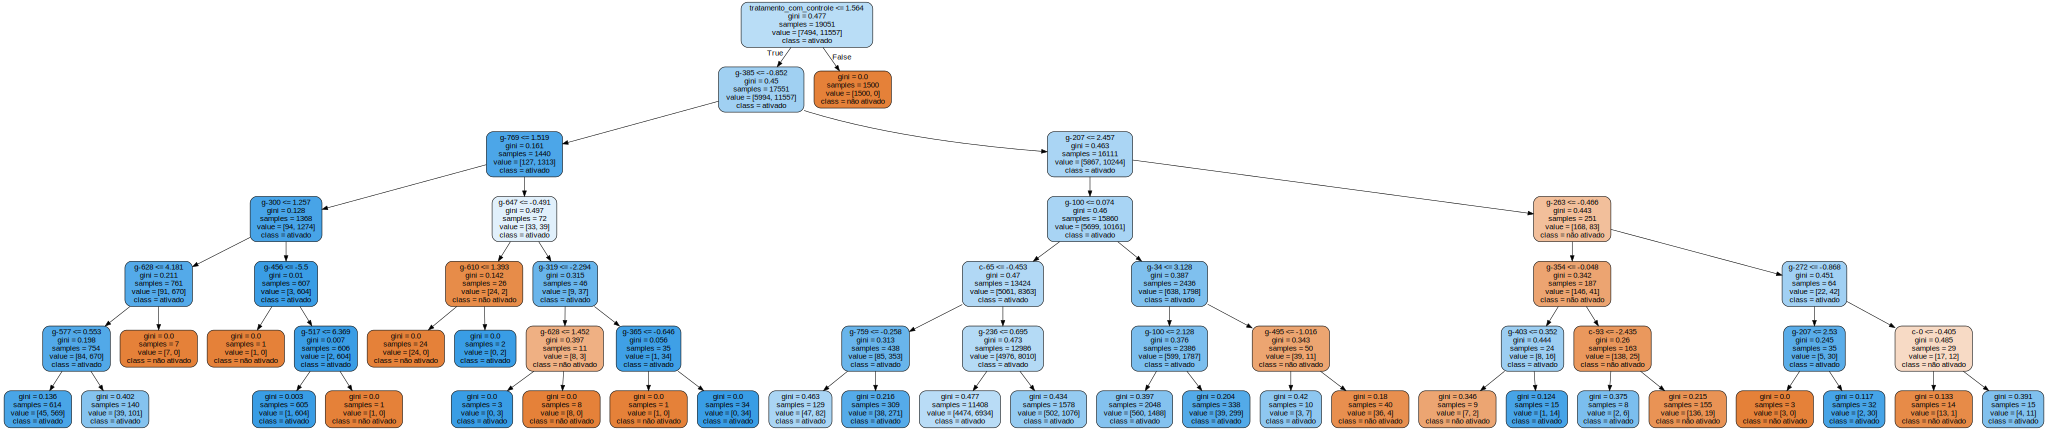

In [27]:
#grafico arvore de decisão
from sklearn.tree import export_graphviz
import graphviz

features = x.columns
dot_data = export_graphviz(modelo_arvore, out_file=None,
                           filled = True, rounded = True,
                           feature_names = features,
                          class_names = ["não ativado", "ativado"])
grafico = graphviz.Source(dot_data)
grafico

##**Conclusão**
Apesar de não ser possível chegar em um modelo de acuracia que possa ser utilizado no mundo real, foi possível explorar os dados para obter informações que podem ser utilizadas para análises mais aprofundadas sobre o tema.

##**Agradecimentos**
Agradeço sinceramente a Alura por proporcionar uma semana tão rica de aprendizados e sempre com uma didática muito leve, muito obrigada aos instrutores não somente pelos ensinamentos transmitidos mas em como o fizeram.


##**Fontes**
Documentação das principais bibliotecas:
*   Pandas
*   Numpy
*   Matplotlib
*   Seaborn
*   SKlearn

Kaggle: https://www.kaggle.com/c/lish-moa

##**Contatos**
Autor: **Angelica Soares de Almeida**

E-mail: **angelsoalmeida@yahoo.com.br**

Linkedin: **linkedin.com/in/angelica-de-almeida-4195b013a**

GitHub: **https://github.com/angelsoalmeida**

